In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


%%

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


%%<br>
ookin at missing values <br>
here are no missing values

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

%%

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA



 a look at correlation matrix

<Axes: >

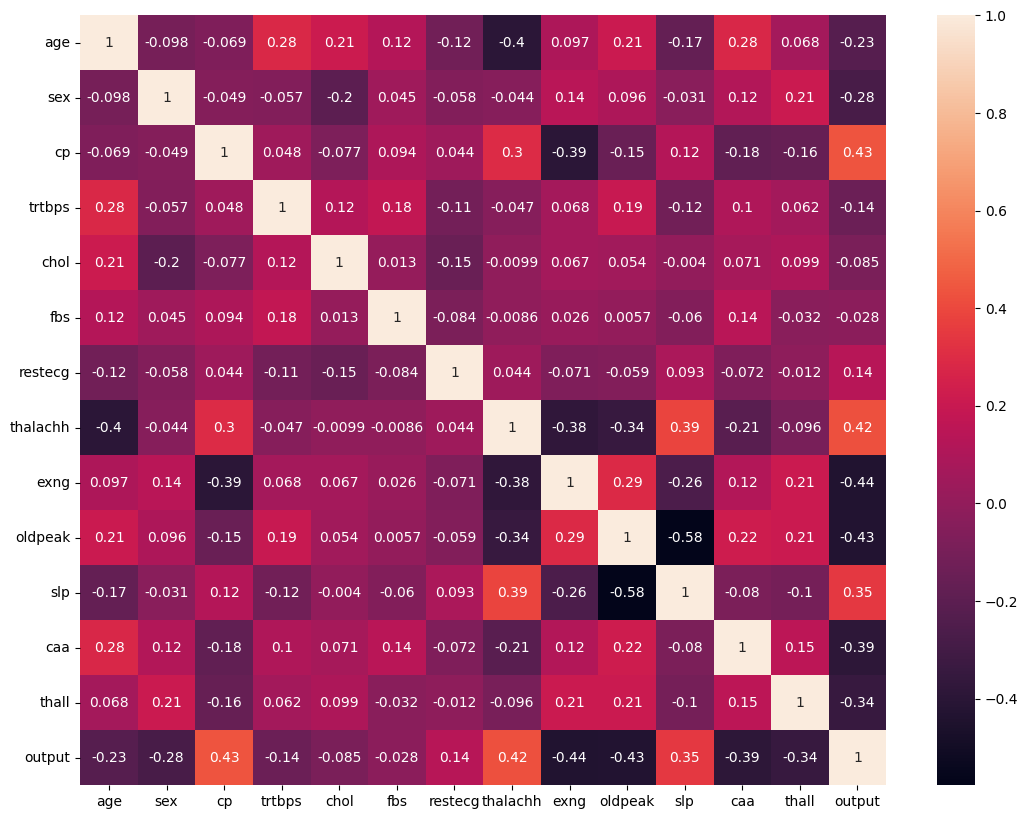

In [7]:
plt.figure(figsize = (13,10))
sns.heatmap(df.corr() , annot= True )

starting from age column 

In [8]:
df.age.iloc[:5]

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

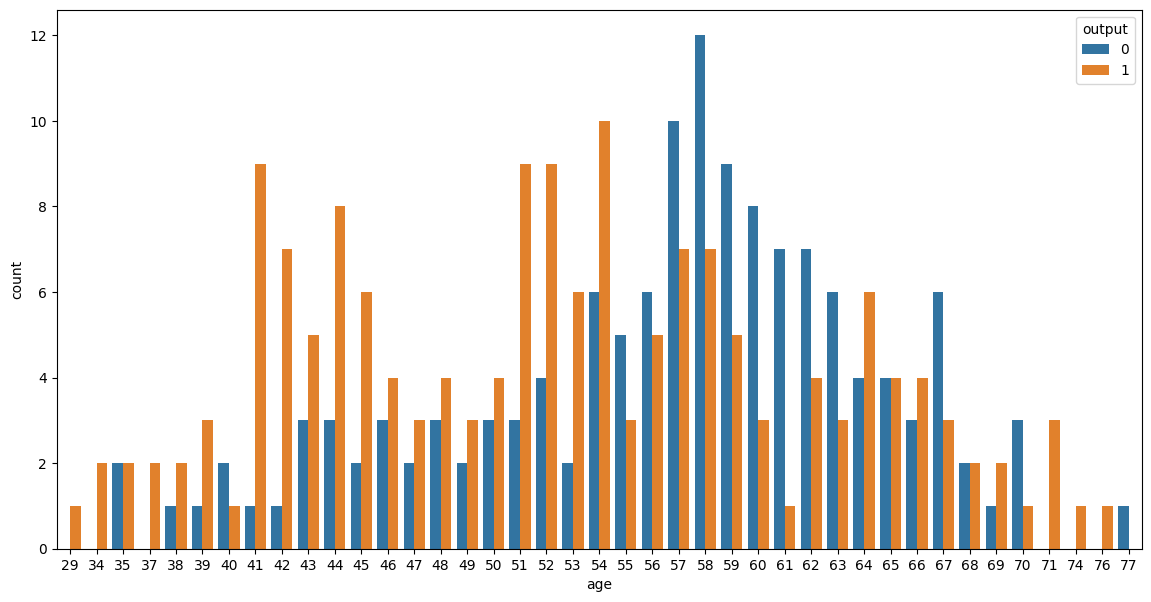

In [9]:
plt.figure(figsize = (14,7))
sns.countplot(data = df , x = 'age', hue = 'output')

%%

The skewness of Age column is -0.2024633654856539


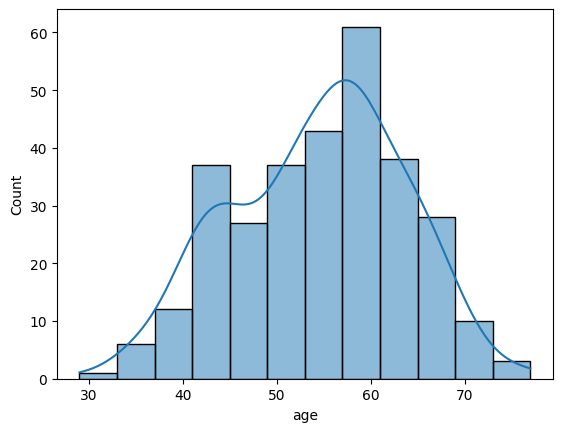

In [10]:
sns.histplot(data = df , x = 'age' , kde = True)
print("The skewness of Age column is {}".format(df.age.skew()))


It seems like after a certain age the chance of heart attack has decereased .<br>
Also the data seems to be close to normally distributed which a good sign 

<Axes: ylabel='age'>

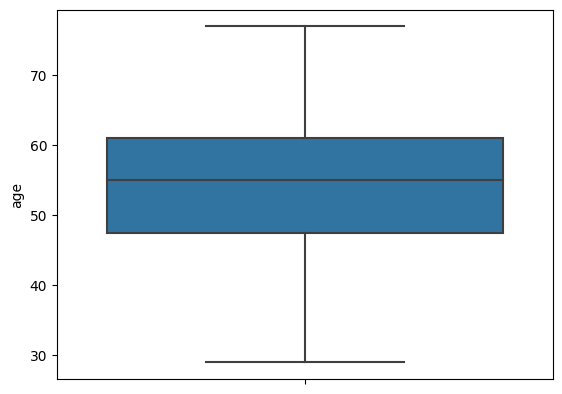

In [11]:
sns.boxplot(data = df , y = 'age' )
#seems have to no outliers 

age groups <br>
0 - 45 - 1 <br>
6 - 60 - 2 <br>
0+ - 3

In [12]:
df['Age group'] = df['age'].apply(lambda x : 1 if 29 <= x <= 45 else( 2 if 46 <= x <= 60 else 3))

In [13]:
df['Age group'].iloc[:5]

0    3
1    1
2    1
3    2
4    2
Name: Age group, dtype: int64

<Axes: xlabel='Age group', ylabel='count'>

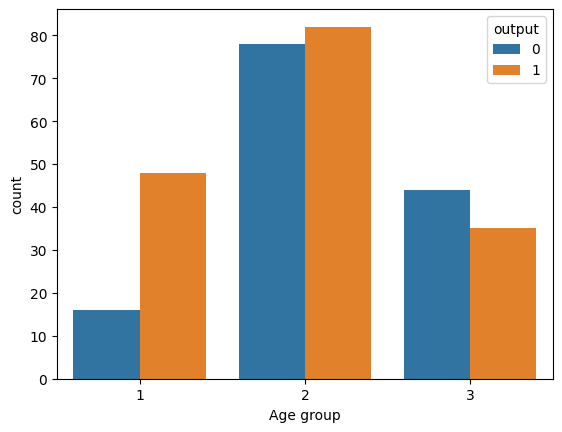

In [14]:
sns.countplot(data = df , x = 'Age group' , hue = 'output' )

In [15]:
df['age'] = np.log(df['age'].values)

taking a look sex column now 

Text(0.5, 0, 'Gender')

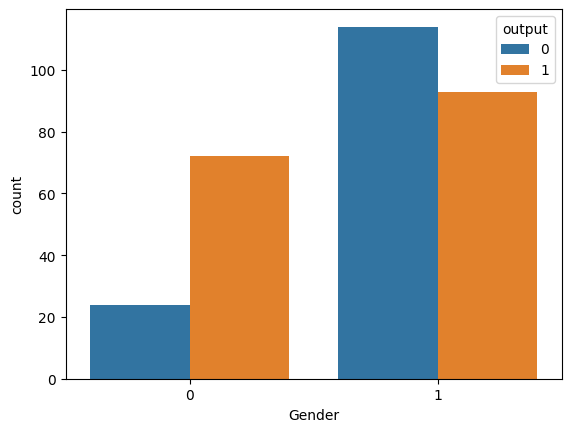

In [16]:
sns.countplot(data = df , x = 'sex' , hue = 'output')
plt.xlabel('Gender')

([<matplotlib.patches.Wedge at 0x7fb8d506d7e0>,
 [Text(-0.5564799687581526, 1.3389660355553927, 'Female'),
  Text(0.42215721767859826, -1.0157673373178844, 'Male')],
 [Text(-0.3645903243587897, 0.877253609501809, '62.54'),
  Text(0.23026757327923536, -0.5540549112643005, '37.46')])

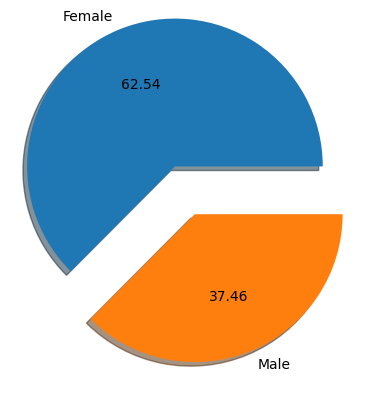

In [17]:
female = df[(df['sex']  == 0) & (df['output'] == 1)]
total_female = df[df['sex'] == 0]
pct_female = (len(female) / len(total_female)) * 100
male = df[(df['sex'] == 1) &  (df['output'] == 1)]
total_male = df[df['sex'] == 1]
pct_male = (len(male) / len(total_male)) * 100
plt.pie(x = [pct_female,pct_male] , labels = ['Female' ,'Male'] , shadow=True , explode=[0.35,0]  , autopct='%.2f')

%% [markdown]<br>
Looks like women had higher chances of heart attack . so women are more likely to have higher chances of heart attack

%%<br>
ooking at chest pain column 

<Axes: xlabel='cp', ylabel='count'>

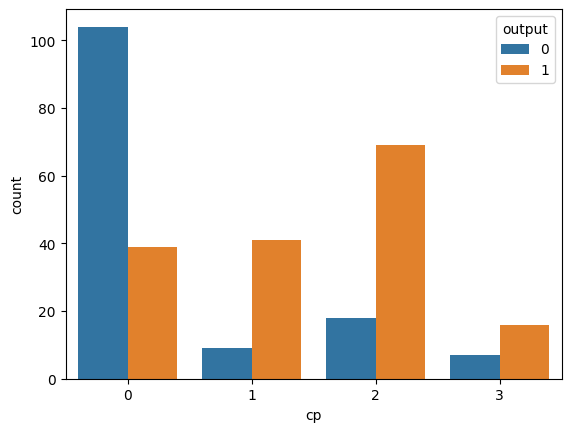

In [18]:
sns.countplot(data = df , x = 'cp' , hue = 'output')

The asymptotic pain is a type of chest pain which cant meet the criteria and from the above plot it seems its very less lethal compared to other chest pains 

**trtbps** is the resting blood pressure of the person . A normal resting blood pressure should be under 120 .

%%

<Axes: xlabel='trtbps', ylabel='Count'>

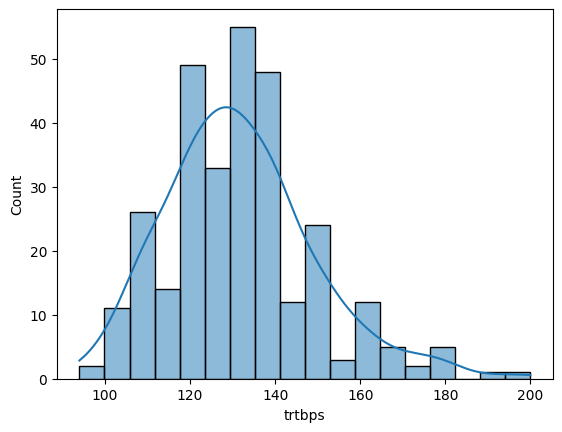

In [19]:
sns.histplot(data = df , x = 'trtbps' , kde = True )

%%

In [20]:
danger = len(df[df['trtbps'] > 120])
print("The number of people with resting blood pressure above 120 are {}".format(danger))

The number of people with resting blood pressure above 120 are 206


%%

([<matplotlib.patches.Wedge at 0x7fb8ccf12e60>,
 [Text(-0.044219558005621634, 1.4493255778774443, 'People above 120 with chance of heart attack'),
  Text(0.03354597453200146, -1.0994883662834722, 'Less chance of heart attack and above 120')],
 [Text(-0.02897143455540728, 0.9495581372300497, '50.97'),
  Text(0.018297804290182615, -0.599720927063712, '49.03')])

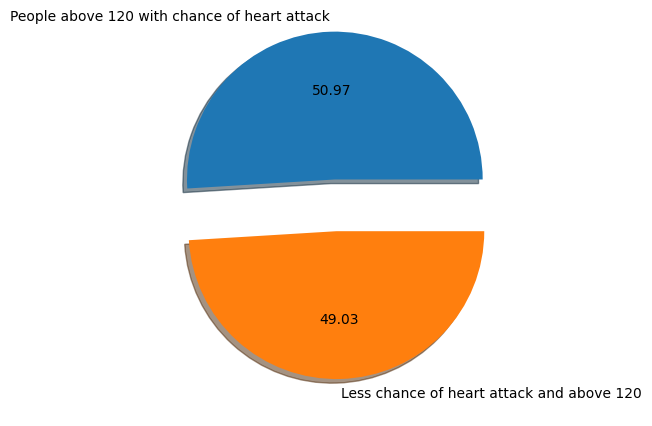

In [21]:
danger_1 = len(df[(df['trtbps'] > 120 ) & (df['output'] == 1)])
pct_danger = (danger_1 / danger) * 100
plt.pie(x = [danger_1,(danger - danger_1)] , labels = ['People above 120 with chance of heart attack' ,'Less chance of heart attack and above 120'] , shadow=True , explode=[0.35,0]  , autopct='%.2f')

%%

In [22]:
normal = len(df[df['trtbps'] <= 120])
normal_1 = len(df[(df['trtbps'] <= 120) & (df['trtbps'] == 1)])
print("People with BP under 120 and have high chance of heart attack {}".format(normal_1))

People with BP under 120 and have high chance of heart attack 0


So, if you have a normal BP then the danger of heart attack seems to be 0 , this is a really good piece of information

In [23]:
df['Danger_BP'] = df['trtbps'].apply(lambda x : 1 if 120 < x < 141 else (2 if x >= 141 else 0))

In [24]:
df['trtbps'] = np.log(df['trtbps'].values)

<Axes: xlabel='trtbps', ylabel='Count'>

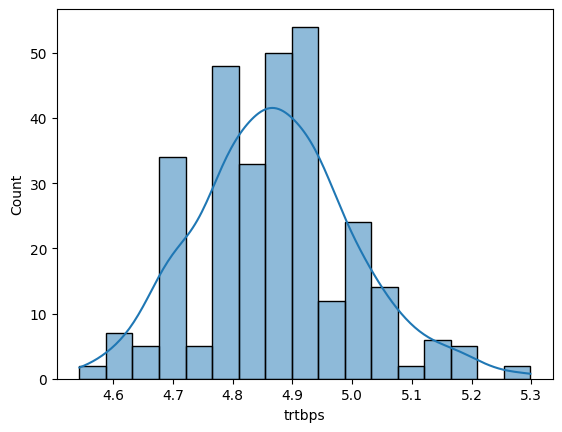

In [25]:
sns.histplot(data = df , x = 'trtbps' , kde = True )

**chol** seems to be related to cholestrol and this column may give us some good insights.

<Axes: xlabel='chol', ylabel='Count'>

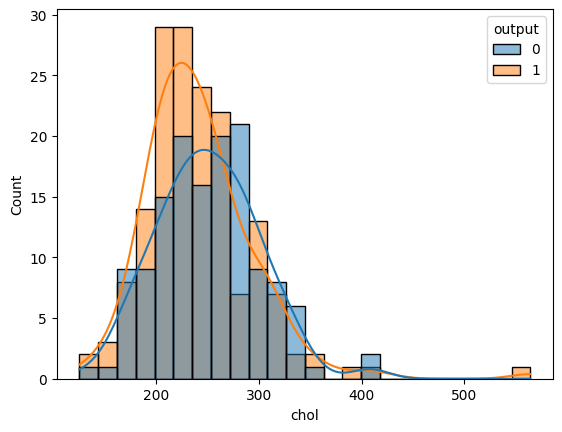

In [26]:
sns.histplot(data = df , x = 'chol' , kde = True , hue = 'output')

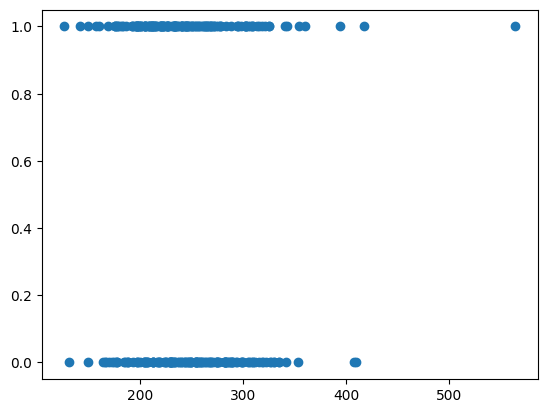

In [27]:
plt.scatter(x = df['chol'] , y = df['output'])

applying log transformation will reduce skewness

In [28]:
df['chol'] = np.log(df['chol'].values)

%%

<Axes: xlabel='chol', ylabel='Count'>

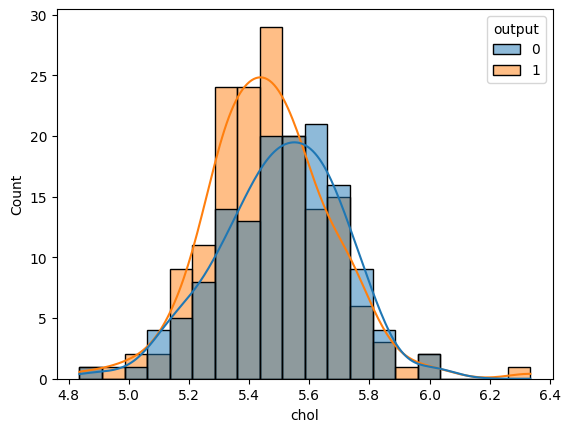

In [29]:
sns.histplot(data = df , x = 'chol' , kde = True , hue = 'output')

**fbs** is related to fasting blood sugar levels . An healthy persons level should be between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). if the fbs is above 120 than in the column its given as 1 

<Axes: xlabel='fbs', ylabel='count'>

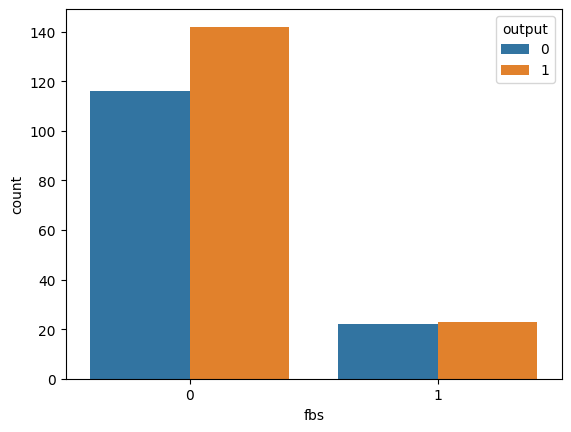

In [30]:
sns.countplot(data = df , x  = 'fbs' , hue = 'output')

Looks like having free blood sugar level less than 120 still has higher chance of heart attack

**restecg** resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

<Axes: xlabel='restecg', ylabel='Count'>

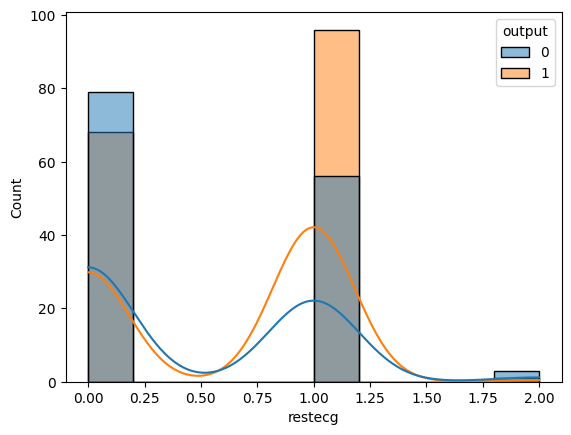

In [31]:
sns.histplot(data = df , x = 'restecg' , hue = 'output' , kde = True)

%% [markdown]<br>
So , having ST-T wave abnormality has very high chance of heart attack

%% [markdown]<br>
**thalach** - Maximum heart beat reached , the maximum heart reached for any person should be age subtracted from 220

%%

<Axes: xlabel='thalachh', ylabel='Count'>

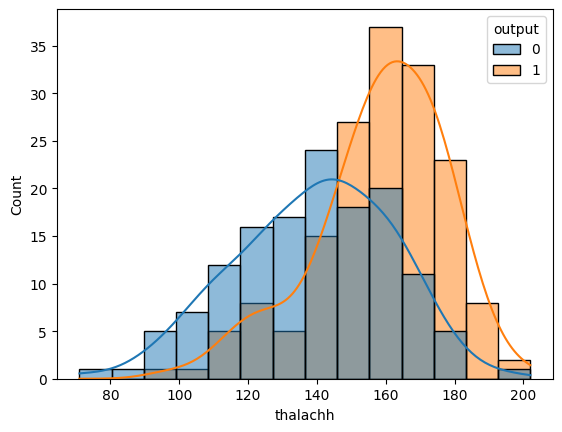

In [32]:
sns.histplot(data = df , x = 'thalachh' , kde = True , hue = 'output')

%%

<Axes: ylabel='thalachh'>

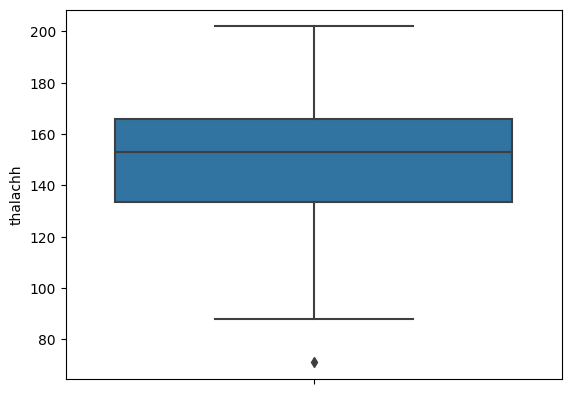

In [33]:
sns.boxplot(data = df , y = 'thalachh')

%% [markdown]<br>
The heart attack chances greatly increase after the highest heart beat reaches above 150 approx

%%

In [34]:
df['MAX_HR'] = df['thalachh'].apply(lambda x : 1 if x > 150 else 0)

%% [markdown]<br>
**execg** - refers to excercised induced aningna , i suppose it refers to chest pain that is induced during exercise

%%

<Axes: xlabel='exng', ylabel='count'>

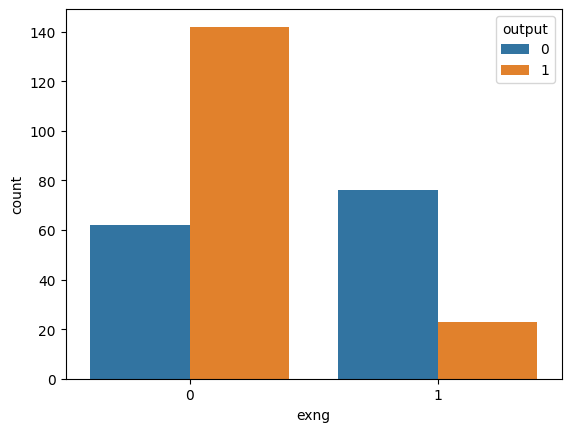

In [35]:
sns.countplot(data = df , x = 'exng' , hue = 'output')

%% [markdown]<br>
So, it seems the anigna induced by exercises has very less likely of a heart attack compared to non-exercise anigna 

%% [markdown]<br>
**oldpeak** - ST depression induced by exercise relative to rest

%%

<Axes: xlabel='oldpeak', ylabel='Count'>

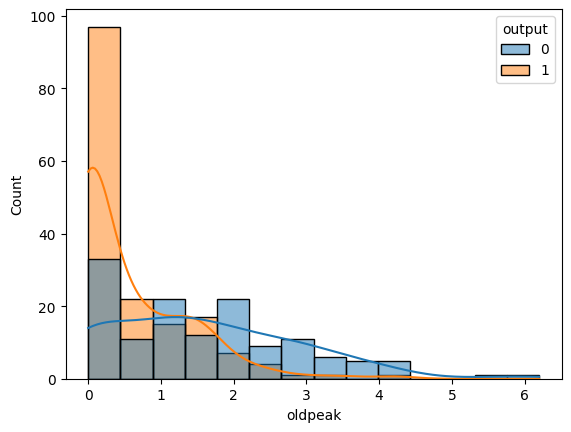

In [36]:
sns.histplot(data = df , x = 'oldpeak' , hue = 'output' , kde = True)

%% [markdown]<br>
**slope** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

%%

<Axes: xlabel='slp', ylabel='count'>

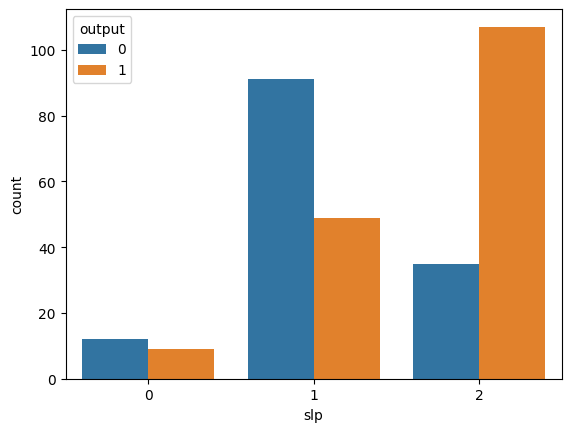

In [37]:
sns.countplot(data = df , x = 'slp' , hue = 'output')

%% [markdown]<br>
having a down slope seems to have high risk of heart attack

%% [markdown]<br>
**ca** - number of major vessels (0-3) colored by flourosopy<br>


%%

<Axes: xlabel='caa', ylabel='count'>

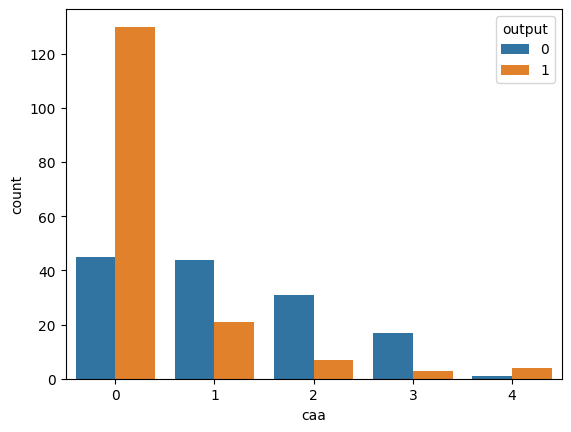

In [38]:
sns.countplot(data = df , x = 'caa' , hue = 'output')

%%

In [39]:
df['caa'] = df['caa'].replace(to_replace=4,value=3)

%%

In [40]:
print(df.caa)

0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: caa, Length: 303, dtype: int64


%% [markdown]<br>
Having no major vessel puts the person at very high risk of heart attack

%%

In [41]:
df['no_mv'] = df['caa'].apply(lambda x : 1 if x == 0 else 0)

%%

In [42]:
print(df['no_mv'].value_counts())

no_mv
1    175
0    128
Name: count, dtype: int64


%% [markdown]<br>
**thal** - 2 = normal; 1 = fixed defect; 3 = reversable defect

%%

<Axes: xlabel='thall', ylabel='count'>

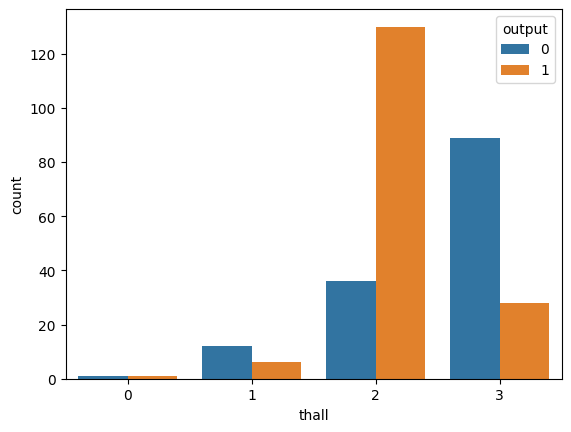

In [43]:
sns.countplot(data = df , x = 'thall' , hue = 'output')

%%

In [44]:
df['thall_2'] = df['thall'].apply(lambda x : 1 if x == 2 else 0)

%%

<Axes: >

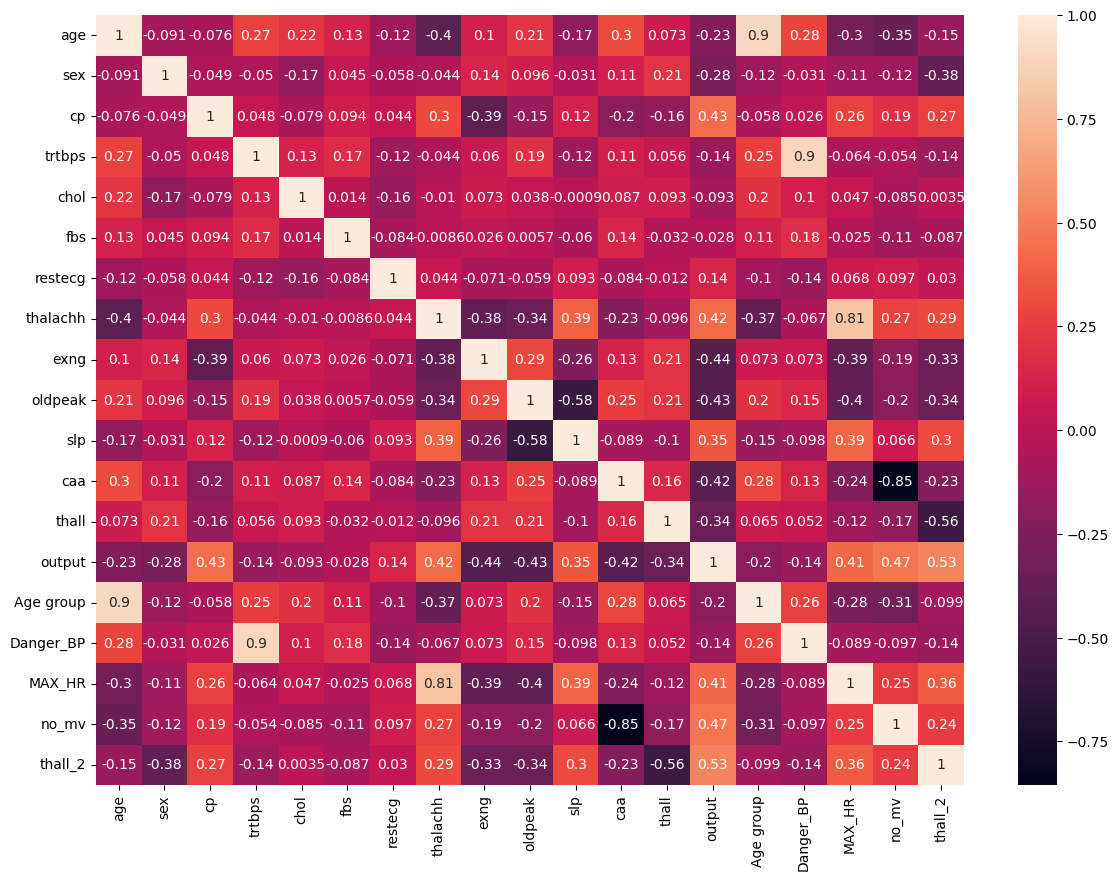

In [45]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr() , annot=True)

%%

In [46]:
df.drop(columns = ['Age group','Danger_BP'] ,axis = 1 , inplace = True)

%% [markdown]<br>
## Modelling

%%

In [47]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,MAX_HR,no_mv,thall_2
0,4.143135,1,3,4.976734,5.451038,1,0,150,0,2.3,0,0,1,1,0,1,0
1,3.610918,1,2,4.867534,5.521461,0,1,187,0,3.5,0,0,2,1,1,1,1
2,3.713572,0,1,4.867534,5.318120,0,0,172,0,1.4,2,0,2,1,1,1,1
3,4.025352,1,1,4.787492,5.463832,0,1,178,0,0.8,2,0,2,1,1,1,1
4,4.043051,0,0,4.787492,5.869297,0,1,163,1,0.6,2,0,2,1,1,1,1


%%

In [48]:
y = df['output']
df.drop(columns = ['output'] , axis = 1,inplace=True)
X = df
y =  np.array(y).reshape(-1,1)
col = df.columns

%%

In [49]:
print(X.shape)
print(y.shape)

(303, 16)
(303, 1)


%%

In [50]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,random_state=0, test_size=0.2)

%%

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

%%

%%

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [54]:
models = {
    "LR" : LogisticRegression(),
    "SVC" : SVC(),
    "DT" : DecisionTreeClassifier(),
    "RF" : RandomForestClassifier(),
    'XG' : XGBClassifier()
}

In [55]:
names = []
train_score = []
valid_score = []

In [56]:
for name , model in models.items():
    names.append(name)
    model.fit(X_train,y_train)
    train_score.append(accuracy_score(y_train,model.predict(X_train)))
    valid_score.append(accuracy_score(y_test,model.predict(X_test)))

/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


%%

In [57]:
print(names)
print(train_score)
print(valid_score)

['LR', 'SVC', 'DT', 'RF', 'XG']
[0.8553719008264463, 0.9173553719008265, 1.0, 1.0, 1.0]
[0.8852459016393442, 0.8524590163934426, 0.7868852459016393, 0.8360655737704918, 0.8360655737704918]


%%

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
print(accuracy_score(y_train,knn.predict(X_train)))
print(accuracy_score(y_test,knn.predict(X_test)))

0.8884297520661157
0.819672131147541


/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


%%

In [59]:
import optuna
def objective(trial):
    param = {
        "kernel" : trial.suggest_categorical("kernel",["linear","poly","rbf"]),
        "C" : trial.suggest_float("C",0,100.0),
        "degree" : trial.suggest_int("degree",1,100),
        
    }
    model = SVC(**param,random_state=0).fit(X_train,y_train)
    accuracy = accuracy_score(y_test,model.predict(X_test))
    return accuracy

/home/liege_pepe/Programming/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective , n_trials= 100)

[I 2023-07-20 14:57:14,456] A new study created in memory with name: no-name-74188552-a931-494d-9ba1-f628e971be29
/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-07-20 14:57:14,464] Trial 0 finished with value: 0.5737704918032787 and parameters: {'kernel': 'poly', 'C': 15.527277870480882, 'degree': 79}. Best is trial 0 with value: 0.5737704918032787.
/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-07-20 14:57:14,790] Trial 1 finished with value: 0.8360655737704918 and parameters: {'kernel': 'linear', 'C':

%%

In [61]:
print(study.best_params)

{'kernel': 'linear', 'C': 6.808144620470058, 'degree': 8}


%%

In [63]:
svc = SVC(**study.best_params).fit(X_train,y_train)
print("The train accuracy is {}".format(accuracy_score(y_train,svc.predict(X_train))))
print("The test accuracy is {}".format(accuracy_score(y_test,svc.predict(X_test))))

The train accuracy is 0.8553719008264463
The test accuracy is 0.8524590163934426


/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
from sklearn.metrics import f1_score
lr = LogisticRegression().fit(X_train,y_train)
print(f1_score(y_test,svc.predict(X_test)))
print(f1_score(y_test,lr.predict(X_test)))



0.8695652173913043
0.8985507246376812


/home/liege_pepe/Programming/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
